# Compliance tests

## Classification

Pierwszy test został przeprowadzony na danych data.simple.

In [1]:
from Perceptron import *
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=[3],
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.1,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
mlp.load("data\data.simple.train.10000.csv")
mlp.train()
mlp.test_classification("data\data.simple.test.10000.csv")

Success ratio: 0.9936


In [ ]:
draw_classification(mlp, "data\data.simple.test.10000.csv")

Kolejny test został przeprowadzony na zbiorze ganych data.three_gauss.

In [ ]:
np.random.seed(1)
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=[3],
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.1,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")

In [ ]:
draw_classification(mlp, "data\data.three_gauss.test.10000.csv")

## Regression

Function $y=x^2$

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=20,
                 bias=True)

mlp.load("data\quadratic1_train.csv")
mlp.train()
draw_regression2d(mlp, x=np.linspace(-5, 5, 1000), func=lambda x: x**2)

Function $z=x^2+xy+5x-1$

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[12],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=30,
                 bias=True)

mlp.load("data\\3d_train.csv")
mlp.train()
draw_regression3d(mlp,
                  x=np.linspace(-5, 5, 50),
                  y=np.linspace(-5, 5, 50),
                  func=lambda x, y:  x**2+x*y+5*x-1)

## Activation function analysis

We will test different activation functions in classification of three_gauss set of data. Rest of the parameters will be the same.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 final=sigmoid,
                 dFinal=dSigmoid,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                 hidden_layers=[3],
                 activation=tanh,
                 dActivation=dTanh,
                 final=tanh,
                 dFinal=dTanh,
                 batch_size=3,
                 learning_rate=0.01,
                 momentum=0.1,
                 epochs=3,
                 bias=True)
mlp.load("data\data.three_gauss.train.10000.csv")
losses = mlp.train()
mlp.test_classification("data\data.three_gauss.test.10000.csv")
plot_errors(losses)

We will test different activation functions in regression of function $y=x^2-3x-5$. Output layer function is identity.

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=sigmoid,
                 dActivation=dSigmoid,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=ReLU,
                 dActivation=dReLU,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

In [ ]:
mlp = Perceptron(problem_type=Perceptron.ProblemType.Regression,
                 hidden_layers=[10],
                 activation=tanh,
                 dActivation=dTanh,
                 batch_size=3,
                 learning_rate=0.001,
                 momentum=0.1,
                 epochs=50,
                 bias=True)

mlp.load("data\quadratic2_train.csv")
losses = mlp.train()
plot_errors(losses)

## Number of layers analysis

We will try various number of layers with 3 neurons each. Rest of parameters will remain the same.

0 hidden layers, last mean error: 0.0013943384853239936


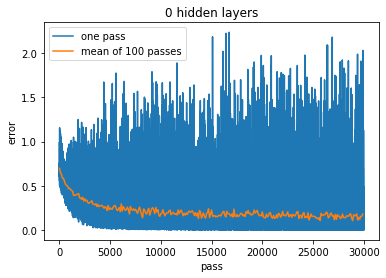

1 hidden layer, last mean error: 0.13164848582536426


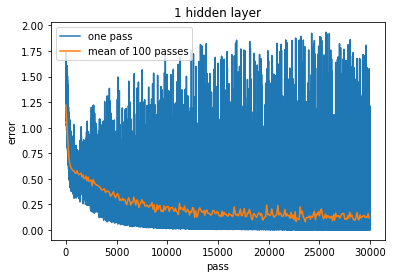

2 hidden layers, last mean error: 0.034113046823189136


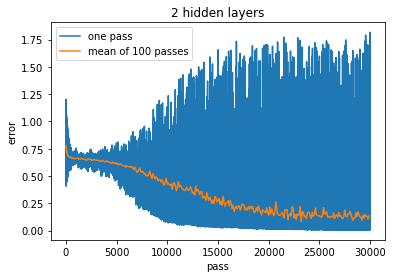

3 hidden layers, last mean error: 0.01970172707125922


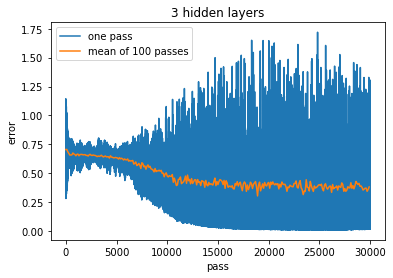

4 hidden layers, last mean error: 0.669485182901862


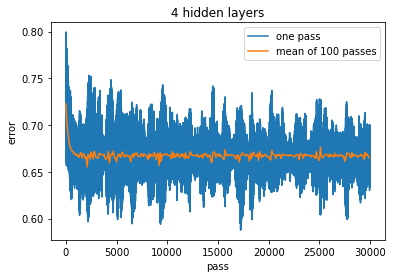

5 hidden layers, last mean error: 0.6379125601289068


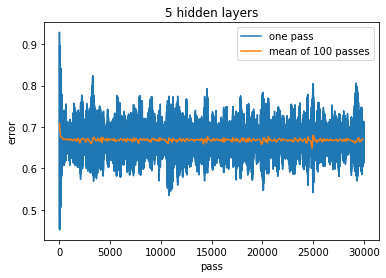

In [2]:
layers = [[],
          [3],
          [3, 3],
          [3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3, 3]]
for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.05,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
    mlp.load("data\data.three_gauss.train.10000.csv")
    losses = mlp.train()
    st = f'{ind} hidden layers' if ind != 1 else f'{ind} hidden layer'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)

We will try various number of neurons (1, 2, 4, 8, ... 512) in one hidden layer. 

1 neuron, last mean error: 0.4356216479834629


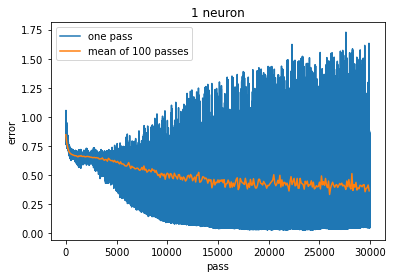

2 neurons, last mean error: 0.012288439381643361


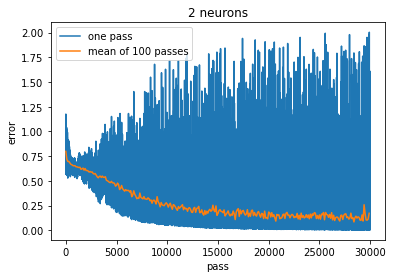

In [3]:
layers = [[1],
          [2],
          [4],
          [8],
          [16],
          [32],
          [64],
          [128],
          [256],
          [512]]

for ind, layer_type in enumerate(layers):
    mlp = Perceptron(problem_type=Perceptron.ProblemType.Classification,
                     hidden_layers=layer_type,
                     activation=sigmoid,
                     dActivation=dSigmoid,
                     final=sigmoid,
                     dFinal=dSigmoid,
                     batch_size=3,
                     learning_rate=0.05,
                     momentum=0.1,
                     epochs=1,
                     bias=True)
    mlp.load("data\data.three_gauss.train.10000.csv")
    losses = mlp.train()
    st = f'{2 ** ind} neurons' if ind != 0 else f'{2 ** ind} neuron'
    print(f'{st}, last mean error: {losses[-1]}')
    plot_errors_title(losses, st)